In [1]:
%autosave 0

Autosave disabled


In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset('data/low_sulfate_reduction_rate+/9_po75-25_di35e-9/water.nc')
growth_phy = ds['B_BIO_GrowthPhy'].to_dataframe()
growth_phy = growth_phy.loc['2011-01-01':'2011-12-31'].reset_index()

In [4]:
foo, phy0 = growth_phy.groupby('z').get_group(growth_phy['z'][0]).sum()
foo, phy1 = growth_phy.groupby('z').get_group(growth_phy['z'][1]).sum()
foo, phy2 = growth_phy.groupby('z').get_group(growth_phy['z'][2]).sum()
foo, phy3 = growth_phy.groupby('z').get_group(growth_phy['z'][3]).sum()

In [5]:
phy0 = phy0*0.05
phy1 = phy1*0.05
phy2 = phy2*1.25
phy3 = phy3*1.25

In [6]:
phy = phy0+phy1+phy2+phy3
phy

313378.4250172734

In [7]:
time_array = growth_phy.groupby('z').get_group(growth_phy['z'][3]).time.values

In [8]:
B_BIO_GrowthPhy_array = growth_phy.groupby('z').get_group(growth_phy['z'][3]).B_BIO_GrowthPhy.values

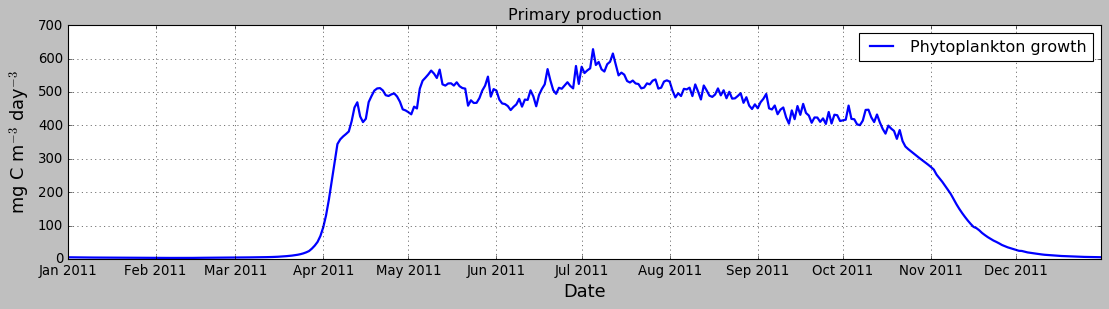

In [9]:
plt.style.use('classic')
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1) # row-col-num
ax.plot(time_array, B_BIO_GrowthPhy_array, linewidth=2, label='Phytoplankton growth')
# --- add title and axis labels
ax.set_title('Primary production')
ax.set_ylabel('mg C m$^{-3}$ day$^{-3}$', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
# --- plot a legend in the best location
ax.legend(loc='best')
# --- add grid – not in default classic style
ax.grid(True)
# --- improve the layout
fig.tight_layout(pad=1)